this model use combine_data.zip for training

#drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#unzip

In [ ]:
!unzip /content/drive/MyDrive/combine_data.zip

串流輸出內容已截斷至最後 5000 行。
  inflating: combine_data/P_NoLeftTurn/train/1344.jpg  
  inflating: combine_data/P_NoLeftTurn/train/1345.jpg  
  inflating: combine_data/P_NoLeftTurn/train/1346.jpg  
  inflating: combine_data/P_NoLeftTurn/train/1347.jpg  
  inflating: combine_data/P_NoLeftTurn/train/1348.jpg  
  inflating: combine_data/P_NoLeftTurn/train/1349.jpg  
  inflating: combine_data/P_NoLeftTurn/train/1350.jpg  
  inflating: combine_data/P_NoLeftTurn/train/1351.jpg  
  inflating: combine_data/P_NoLeftTurn/train/1352.jpg  
  inflating: combine_data/P_NoLeftTurn/train/1353.jpg  
  inflating: combine_data/P_NoLeftTurn/train/1354.jpg  
  inflating: combine_data/P_NoLeftTurn/train/1355.jpg  
  inflating: combine_data/P_NoLeftTurn/train/1356.jpg  
  inflating: combine_data/P_NoLeftTurn/train/1357.jpg  
  inflating: combine_data/P_NoLeftTurn/train/1358.jpg  
  inflating: combine_data/P_NoLeftTurn/train/1359.jpg  
  inflating: combine_data/P_NoLeftTurn/train/1360.jpg  
  inflating: combine_data/P

#import

In [ ]:
import numpy as np                               
import pandas as pd                                    
import tensorflow as tf
import tensorflow.keras
import os   
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
from tensorflow.keras import optimizers, Sequential
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau 
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Conv2D, Dense, Flatten, MaxPooling2D, BatchNormalization, Dropout
from tensorflow.keras.utils import to_categorical                   
from PIL import Image         
from sklearn.model_selection import train_test_split, KFold     
from sklearn.utils import shuffle 
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
from sklearn.metrics import confusion_matrix


#labels

In [ ]:
def getClassName(classNo):
    if  classNo == 0: return "M_CarOnly"
    elif classNo == 1: return "M_DirectionForMotorcycles"
    elif classNo == 2: return "M_KeepLeft"
    elif classNo == 3: return "M_KeepRight"
    elif classNo == 4: return "M_LeftTurn"
    elif classNo == 5: return "M_RightTurn"
    elif classNo == 6: return "M_Roundabout"
    elif classNo == 7: return "M_StraightOnly"
    elif classNo == 8: return "M_StraightOrLeftTurn"
    elif classNo == 9: return "M_StraightOrRightTurn"
    elif classNo == 10: return "Other_Circle"
    elif classNo == 11: return "Other_Diamond"
    elif classNo == 12: return "Other_Triangle"
    elif classNo == 13: return "Other_TriangleV"
    elif classNo == 14: return "P_NoEntry"
    elif classNo == 15: return "P_NoLeftTurn"
    elif classNo == 16: return "P_NoRightAndLeftTurn"
    elif classNo == 17: return "P_NoRightTurn"
    elif classNo == 18: return "P_NoStopping"
    elif classNo == 19: return "P_NoUTurn"
    elif classNo == 20: return "P_SpecialRightTurn"
    elif classNo == 21: return "P_SpeedLimit100"
    elif classNo == 22: return "P_SpeedLimit120"
    elif classNo == 23: return "P_SpeedLimit20"
    elif classNo == 24: return "P_SpeedLimit30"
    elif classNo == 25: return "P_SpeedLimit40"
    elif classNo == 26: return "P_SpeedLimit50"
    elif classNo == 27: return "P_SpeedLimit60"
    elif classNo == 28: return "P_SpeedLimit70"
    elif classNo == 29: return "P_SpeedLimit80"
    elif classNo == 30: return "W_Children"
    elif classNo == 31: return "W_CurveToLeft"
    elif classNo == 32: return "W_CurveToRight"
    elif classNo == 33: return "W_DoubleCurve1"
    elif classNo == 34: return "W_DoubleCurve2"
    elif classNo == 35: return "W_FallingRocks"
    elif classNo == 36: return "W_OtherDanger"
    elif classNo == 37: return "W_Pedestrians"
    elif classNo == 38: return "W_RoadNarrows"
    elif classNo == 39: return "W_RoadTrafficLights"
    elif classNo == 40: return "W_SeparateIsland"
    elif classNo == 41: return "W_SlipperyRoad"
    elif classNo == 42: return "W_Slow"
    elif classNo == 43: return "W_Stop"
    elif classNo == 44: return "W_UnevenRoad"

In [ ]:
file_name = [
        "M_CarOnly",
        "M_DirectionForMotorcycles",
        "M_KeepLeft",
        "M_KeepRight",
        "M_LeftTurn",
        "M_RightTurn",
        "M_Roundabout",
        "M_StraightOnly",
        "M_StraightOrLeftTurn",
        "M_StraightOrRightTurn",
        "Other_Circle",
        "Other_Diamond",
        "Other_Triangle",
        "Other_TriangleV",
        "P_NoEntry",
        "P_NoLeftTurn",
        "P_NoRightAndLeftTurn",
        "P_NoRightTurn",
        "P_NoStopping",
        "P_NoUTurn",
        "P_SpecialRightTurn",
        "P_SpeedLimit100",
        "P_SpeedLimit120",
        "P_SpeedLimit20",
        "P_SpeedLimit30",
        "P_SpeedLimit40",
        "P_SpeedLimit50",
        "P_SpeedLimit60",
        "P_SpeedLimit70",
        "P_SpeedLimit80",
        "W_Children",
        "W_CurveToLeft",
        "W_CurveToRight",
        "W_DoubleCurve1",
        "W_DoubleCurve2",
        "W_FallingRocks",
        "W_OtherDanger",
        "W_Pedestrians",
        "W_RoadNarrows",
        "W_RoadTrafficLights",
        "W_SeparateIsland",
        "W_SlipperyRoad",
        "W_Slow",
        "W_Stop",
        "W_UnevenRoad"
        ]
classes = len(file_name)

# from sklearn.preprocessing import LabelEncoder
# labelencoder = LabelEncoder()

file_name_label = labelencoder.fit_transform(file_name)
print(file_name_label)
file_name_label = to_categorical(file_name_label)
classes

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44]


45

#traindata

In [ ]:
# import numpy as np
traindata = []
labels = []
# import os

for i in file_name:
  path = os.path.join(os.getcwd(),'combine_data',i,'train')
  images = os.listdir(path)
# from PIL import Image 
  for j in images:
    print(path + '/'+ j)
    try:
      image = Image.open(path + '/'+ j)
      image = image.resize((32,32))
      image = np.array(image)
      traindata.append(image)
      labels.append(i)
    except:
      print("Error loading image")
#Converting lists into numpy arrays bcoz its faster and takes lesser memory
traindata = np.array(traindata)
labels = np.array(labels)
print(traindata.shape, labels.shape)

串流輸出內容已截斷至最後 5000 行。
/content/combine_data/M_KeepRight/train/261.jpg
/content/combine_data/M_KeepRight/train/M_KeepRight88.jpg
/content/combine_data/M_KeepRight/train/M_KeepRight27.jpg
/content/combine_data/M_KeepRight/train/M_KeepRight110.jpg
/content/combine_data/M_KeepRight/train/216.jpg
/content/combine_data/M_KeepRight/train/234.jpg
/content/combine_data/M_KeepRight/train/M_KeepRight114.jpg
/content/combine_data/M_KeepRight/train/M_KeepRight108.jpg
/content/combine_data/M_KeepRight/train/255.jpg
/content/combine_data/M_KeepRight/train/M_KeepRight75.jpg
/content/combine_data/M_KeepRight/train/250.jpg
/content/combine_data/M_KeepRight/train/220.jpg
/content/combine_data/M_KeepRight/train/M_KeepRight42.jpg
/content/combine_data/M_KeepRight/train/275.jpg
/content/combine_data/M_KeepRight/train/242.jpg
/content/combine_data/M_KeepRight/train/M_KeepRight15.jpg
/content/combine_data/M_KeepRight/train/284.jpg
/content/combine_data/M_KeepRight/train/277.jpg
/content/combine_data/M_KeepRigh

In [ ]:
labels = labelencoder.fit_transform(labels)
labels = to_categorical(labels)

print(traindata.shape, labels.shape)

(5537, 32, 32, 3) (5537, 45)


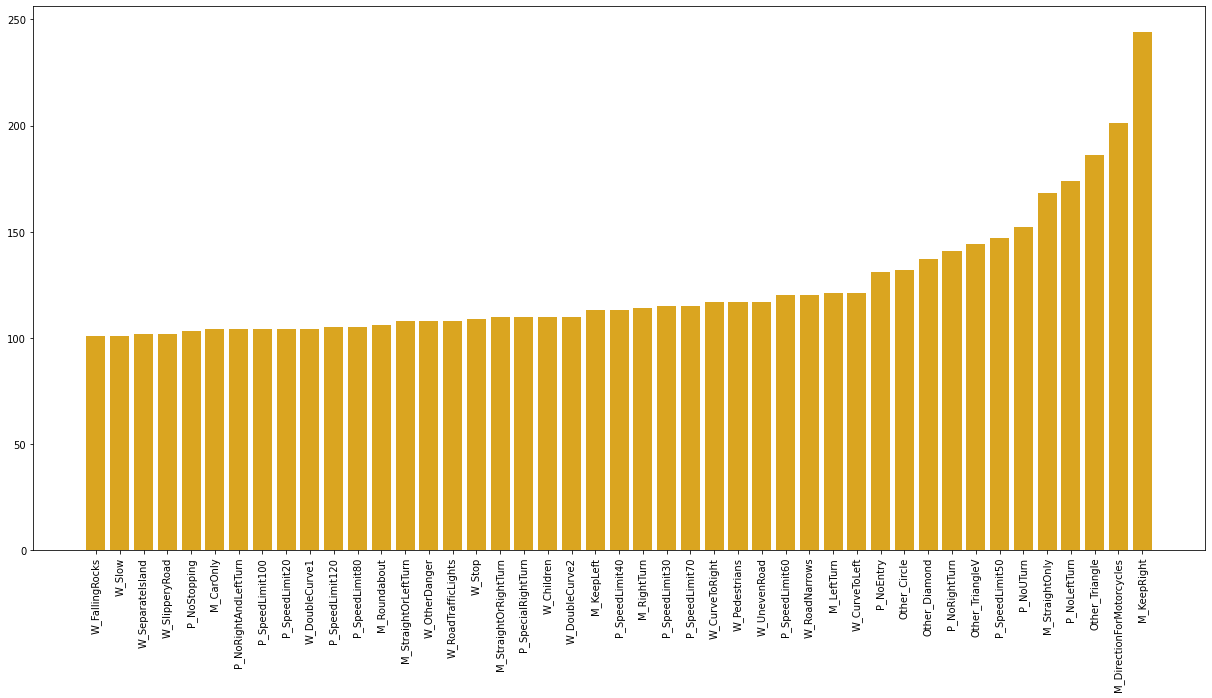

In [ ]:
train_number = []
class_num = []

for i in file_name:
  path = os.path.join(os.getcwd(),'combine_data',i,'train')
  train_files = os.listdir(path)
  train_number.append(len(train_files))
  class_num.append(i)  
    
# Sorting the dataset on the basis of number of images in each class
zipped_lists = zip(train_number, class_num)
sorted_pairs = sorted(zipped_lists)
tuples = zip(*sorted_pairs)
train_number, class_num = [ list(tuple) for tuple in  tuples]

# Plotting the number of images in each class
plt.figure(figsize=(21,10))  
plt.bar(class_num, train_number, color = 'goldenrod',)
plt.xticks(class_num, rotation='vertical')
plt.show()

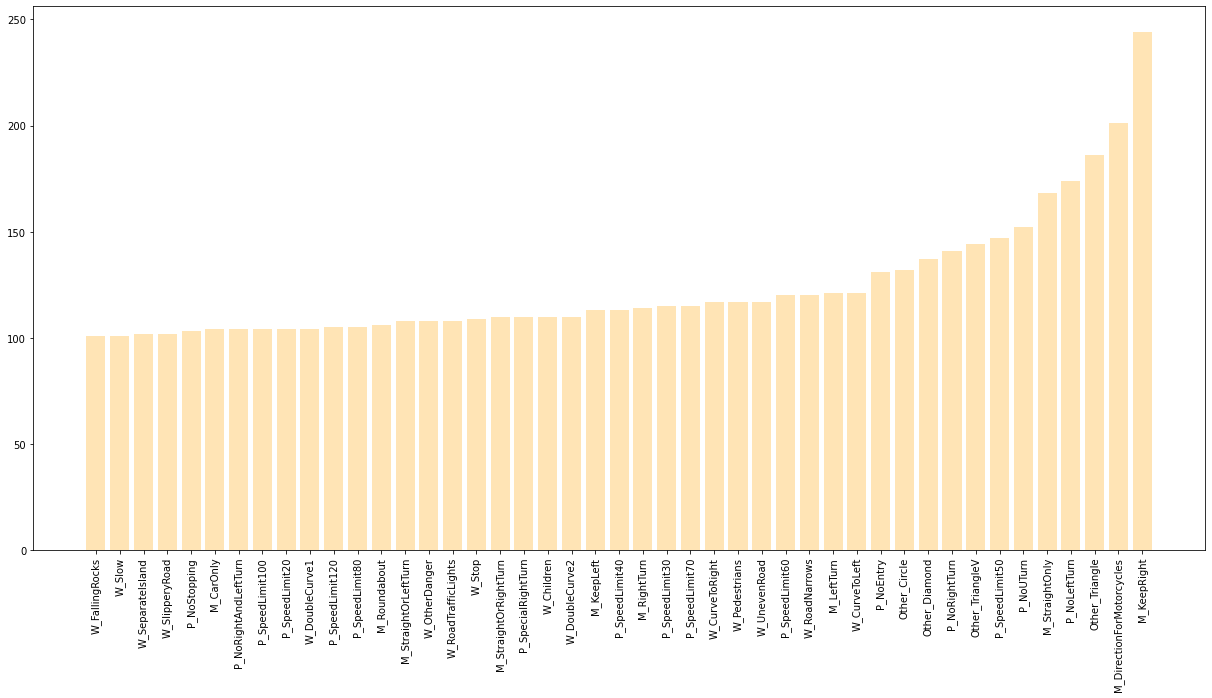

In [ ]:
train_number = []
class_num = []

for i in file_name:
  path = os.path.join(os.getcwd(),'combine_data',i,'train')
  train_files = os.listdir(path)
  train_number.append(len(train_files))
  class_num.append(i)  
    
# Sorting the dataset on the basis of number of images in each class
zipped_lists = zip(train_number, class_num)
sorted_pairs = sorted(zipped_lists)
tuples = zip(*sorted_pairs)
train_number, class_num = [ list(tuple) for tuple in  tuples]

# Plotting the number of images in each class
plt.figure(figsize=(21,10))  
plt.bar(class_num, train_number, color = 'moccasin',)
plt.xticks(class_num, rotation='vertical')
plt.show()

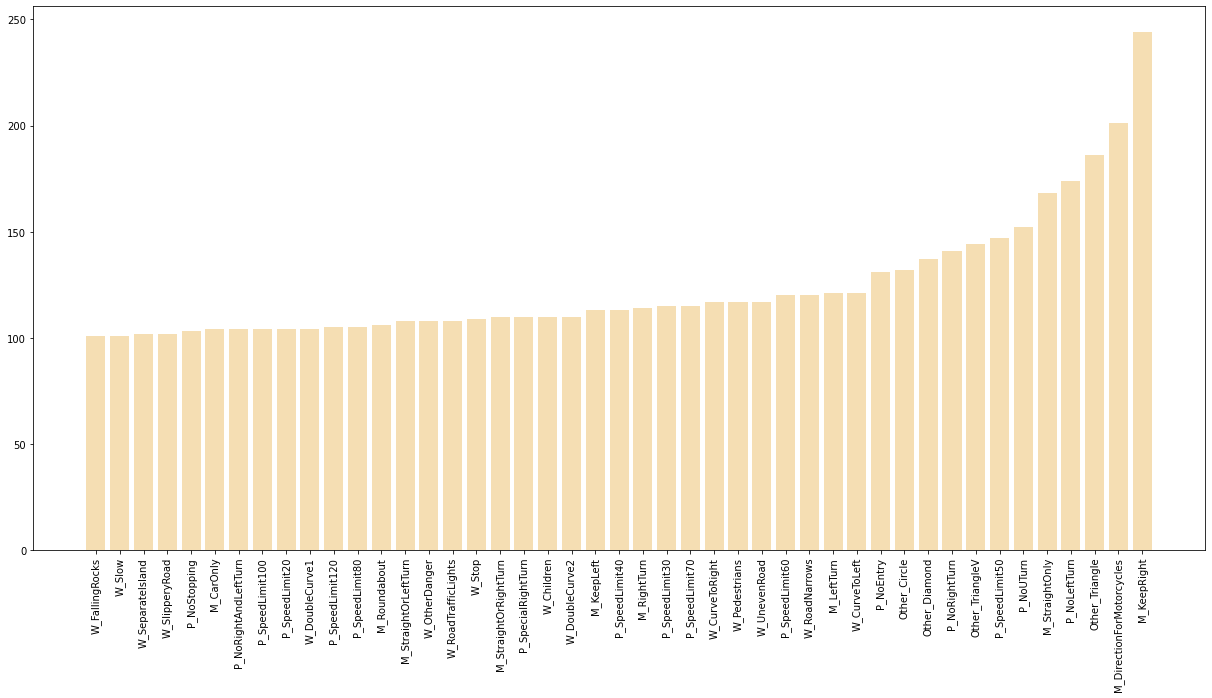

In [ ]:
train_number = []
class_num = []

for i in file_name:
  path = os.path.join(os.getcwd(),'combine_data',i,'train')
  train_files = os.listdir(path)
  train_number.append(len(train_files))
  class_num.append(i)  
    
# Sorting the dataset on the basis of number of images in each class
zipped_lists = zip(train_number, class_num)
sorted_pairs = sorted(zipped_lists)
tuples = zip(*sorted_pairs)
train_number, class_num = [ list(tuple) for tuple in  tuples]

# Plotting the number of images in each class
plt.figure(figsize=(21,10))  
plt.bar(class_num, train_number, color = 'wheat',)
plt.xticks(class_num, rotation='vertical')
plt.show()

In [ ]:
train_csv = pd.DataFrame(train_number, index=class_num, columns=['num'])

In [ ]:
X_train = traindata
y_train = labels

In [ ]:
from sklearn.utils import shuffle   
X_train, y_train = shuffle(X_train,y_train)

#testdata

In [ ]:
testdata = []
test_labels = []
for i in file_name:
  path = os.path.join(os.getcwd(),'combine_data',i,'test')
  images = os.listdir(path)
  
  for j in images:
    try:
      image = Image.open(path + '/'+ j)
      image = image.resize((32,32))
      image = np.array(image)
      testdata.append(image)
      test_labels.append(i)
    except:
      print("Error loading image")
#Converting lists into numpy arrays bcoz its faster and takes lesser #memory
testdata = np.array(testdata)
test_labels = np.array(test_labels)
print(testdata.shape,test_labels.shape)

Error loading image
Error loading image
Error loading image
Error loading image
Error loading image
Error loading image
Error loading image
Error loading image
Error loading image
Error loading image
Error loading image
Error loading image
Error loading image
Error loading image
Error loading image
Error loading image
Error loading image
Error loading image
Error loading image
Error loading image
Error loading image
Error loading image
Error loading image
Error loading image
Error loading image
Error loading image
Error loading image
Error loading image
Error loading image
Error loading image
Error loading image
Error loading image
Error loading image
Error loading image
Error loading image
Error loading image
Error loading image
Error loading image
Error loading image
Error loading image
Error loading image
(2248, 32, 32, 3) (2248,)


In [ ]:
X_test = testdata
y_test = test_labels
print(y_test)
y_test = labelencoder.fit_transform(y_test)
print(y_test)
y_test = to_categorical(y_test)
print(y_test.shape)

['M_CarOnly' 'M_CarOnly' 'M_CarOnly' ... 'W_UnevenRoad' 'W_UnevenRoad'
 'W_UnevenRoad']
[ 0  0  0 ... 44 44 44]
(2248, 45)


In [ ]:
X_test, y_test = shuffle(X_test,y_test)

#model4(Full)


##create model

In [ ]:
#VGG19
base_model = tensorflow.keras.applications.VGG19(weights='imagenet',
                          include_top=False,
                          input_shape=(32, 32, 3))  
model = tf.keras.Sequential(base_model.layers[:],name = 'VGG19_combine_data')
model.summary()

Model: "VGG19_combine_data"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
block1_conv1 (Conv2D)        (None, 32, 32, 64)        1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 32, 32, 64)        36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 16, 16, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 16, 16, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 16, 16, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 8, 8, 128)         0         
_________________________________________________________________
block3_conv1 (Conv2D)        (None, 8, 8, 256)  

In [ ]:
# model
model.add(BatchNormalization())
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(classes, activation='softmax'))
model.summary()

Model: "VGG19_combine_data_Full"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg19 (Functional)           (None, 1, 1, 512)         20024384  
_________________________________________________________________
batch_normalization_1 (Batch (None, 1, 1, 512)         2048      
_________________________________________________________________
flatten_1 (Flatten)          (None, 512)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 256)               131328    
_________________________________________________________________
dropout_1 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 45)                11565     
Total params: 20,169,325
Trainable params: 20,168,301
Non-trainable params: 1,024
___________________________

##callbacks setting

In [ ]:
# 增加checkpoint, earlystopping, rlr
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau 
#自動儲存
checkpoint = ModelCheckpoint('/content/drive/MyDrive/VGG19_combinedata_Full_Kfold.h5',  
                monitor='accuracy', 
                verbose=0, 
                save_best_only= True, 
                mode='auto')
#earlystopping
earlystopping = EarlyStopping(monitor='accuracy', mode="auto", patience=5, verbose=1, min_delta=0, restore_best_weights=True)

#學習率 min_delta=0.0001
rlr = ReduceLROnPlateau(monitor='loss', factor=0.1, patience=3, verbose=0, mode='auto', min_delta=0.0001) 

##K-Fold

In [ ]:
kfold = KFold(n_splits=5, shuffle=True)

In [ ]:
# K-fold Cross Validation model evaluation
fold_no = 1

##model compile&fit

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

acc_per_fold = []
loss_per_fold = []
for train, test in kfold.split(X_train, y_train):
  # Generate a print
  print('------------------------------------------------------------------------')
  print(f'Training for fold {fold_no} ...')

  # Fit data to model
  history = model.fit( X_train[train], 
              y_train[train],
              batch_size=64,
              epochs=10,
              # validation_split=0.1,
              callbacks = [checkpoint,earlystopping,rlr],
            )
  # Generate generalization metrics
  scores = model.evaluate(X_train[test], y_train[test], verbose=0)
  print(f'Score for fold {fold_no}: {model.metrics_names[0]} of {scores[0]}; {model.metrics_names[1]} of {scores[1]*100}%')
  acc_per_fold.append(scores[1] * 100)
  loss_per_fold.append(scores[0])

  # Increase fold number
  fold_no = fold_no + 1

------------------------------------------------------------------------
Training for fold 1 ...
Epoch 1/10
70/70 [==============================] - 4s 45ms/step - loss: 3.8773 - accuracy: 0.0350
Epoch 2/10
70/70 [==============================] - 3s 44ms/step - loss: 3.6675 - accuracy: 0.0506
Epoch 3/10
70/70 [==============================] - 3s 44ms/step - loss: 3.5132 - accuracy: 0.0598
Epoch 4/10
70/70 [==============================] - 3s 44ms/step - loss: 3.3876 - accuracy: 0.0732
Epoch 5/10
70/70 [==============================] - 3s 44ms/step - loss: 3.2972 - accuracy: 0.0862
Epoch 6/10
70/70 [==============================] - 3s 44ms/step - loss: 3.2148 - accuracy: 0.0804
Epoch 7/10
70/70 [==============================] - 3s 45ms/step - loss: 3.1865 - accuracy: 0.0874
Epoch 8/10
70/70 [==============================] - 3s 45ms/step - loss: 3.1233 - accuracy: 0.0833
Epoch 9/10
70/70 [==============================] - 3s 45ms/step - loss: 3.0637 - accuracy: 0.0921
Epoch 10/10


##test accuracy

In [ ]:
test_loss, test_accuracy = model.evaluate(X_test,y_test)
print(f'test_loss={test_loss}')
print(f'test_accuracy={test_accuracy}')

71/71 [==============================] - 1s 11ms/step - loss: 2.2686 - accuracy: 0.1775
test_loss=2.2686002254486084
test_accuracy=0.17749109864234924


##draw

估測值=[38  3 13 12 25  3  3 34 12  3  3 27 26  3 25 25 38 27 12 34 11 25 19 12
 44]
[36, 2, 37, 40, 23, 5, 8, 31, 44, 2, 6, 28, 26, 1, 21, 25, 36, 23, 40, 33, 38, 22, 20, 30, 42]


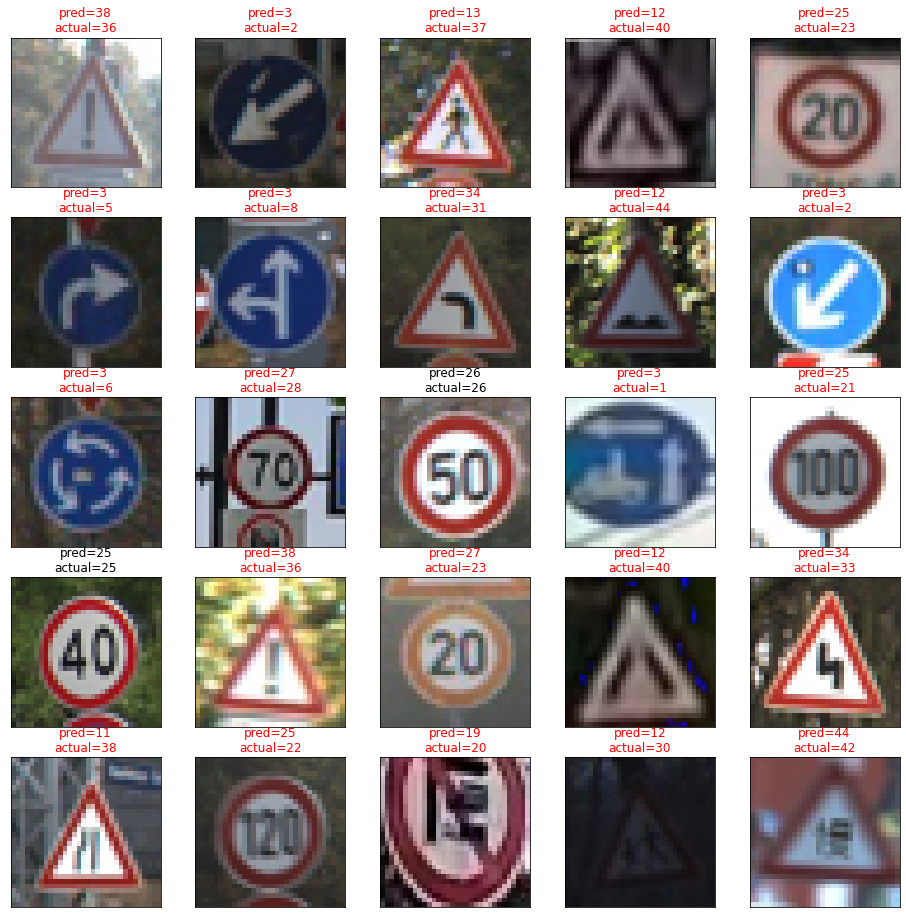

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(16,16))

result = model.predict(X_test)
#每一列為一張圖的估測結果，也就是每一類的信心值
#因此應該取列的最大值所在的index，因此axis=1
print(f'估測值={np.argmax(result[:25],axis=1)}')

#取得標準答案
label = []
for i in range(25):
  label.append(y_test[i].argmax())
print(label)

#目前選擇前25張圖來顯示結果
for i in range(25):
  plt.subplot(5,5, i +1)
  plt.xticks([])
  plt.yticks([])    
  predict_class_name = np.argmax(result[i],axis=0)
  label_name = label[i]
  title1 = plt.title(f'pred={predict_class_name}\nactual={label_name}')
  if predict_class_name != label_name:
    plt.setp(title1, color='r')
  plt.imshow(X_test[i], cmap = plt.get_cmap('gray'))    
plt.show()


before np.argmax: result=[[3.73017159e-04 1.44863816e-03 3.65183310e-04 ... 9.26689059e-03
  1.40888278e-05 5.03511587e-03]
 [6.74064755e-02 1.38951436e-01 7.70285651e-02 ... 5.89678422e-08
  6.96148130e-12 5.61378555e-10]
 [2.05904781e-03 5.80052659e-03 1.83898478e-03 ... 1.65486999e-03
  1.03086245e-06 5.36075910e-04]
 ...
 [6.74084350e-02 1.38949767e-01 7.70278648e-02 ... 5.90621205e-08
  6.97362784e-12 5.62557612e-10]
 [8.93811691e-09 3.87408420e-07 1.71404508e-08 ... 6.84952065e-02
  4.12450433e-02 8.45895857e-02]
 [2.45706191e-22 2.01574717e-17 4.31631245e-21 ... 1.33854865e-08
  1.73631858e-03 6.22757887e-11]]
after np.argmax: y_pred=[38  3 13 ...  3 33 19]
y_test=[36, 2, 37, 40, 23, 5, 8, 31, 44, 2, 6, 28, 26, 1, 21, 25, 36, 23, 40, 33, 38, 22, 20, 30, 42, 37, 11, 22, 39, 30, 35, 8, 26, 31, 28, 41, 34, 22, 25, 4, 32, 26, 7, 36, 6, 17, 14, 22, 19, 11, 32, 7, 27, 42, 33, 10, 26, 24, 37, 32, 44, 17, 10, 9, 2, 43, 27, 27, 36, 32, 7, 13, 29, 10, 34, 29, 32, 3, 29, 9, 20, 41, 19, 5, 

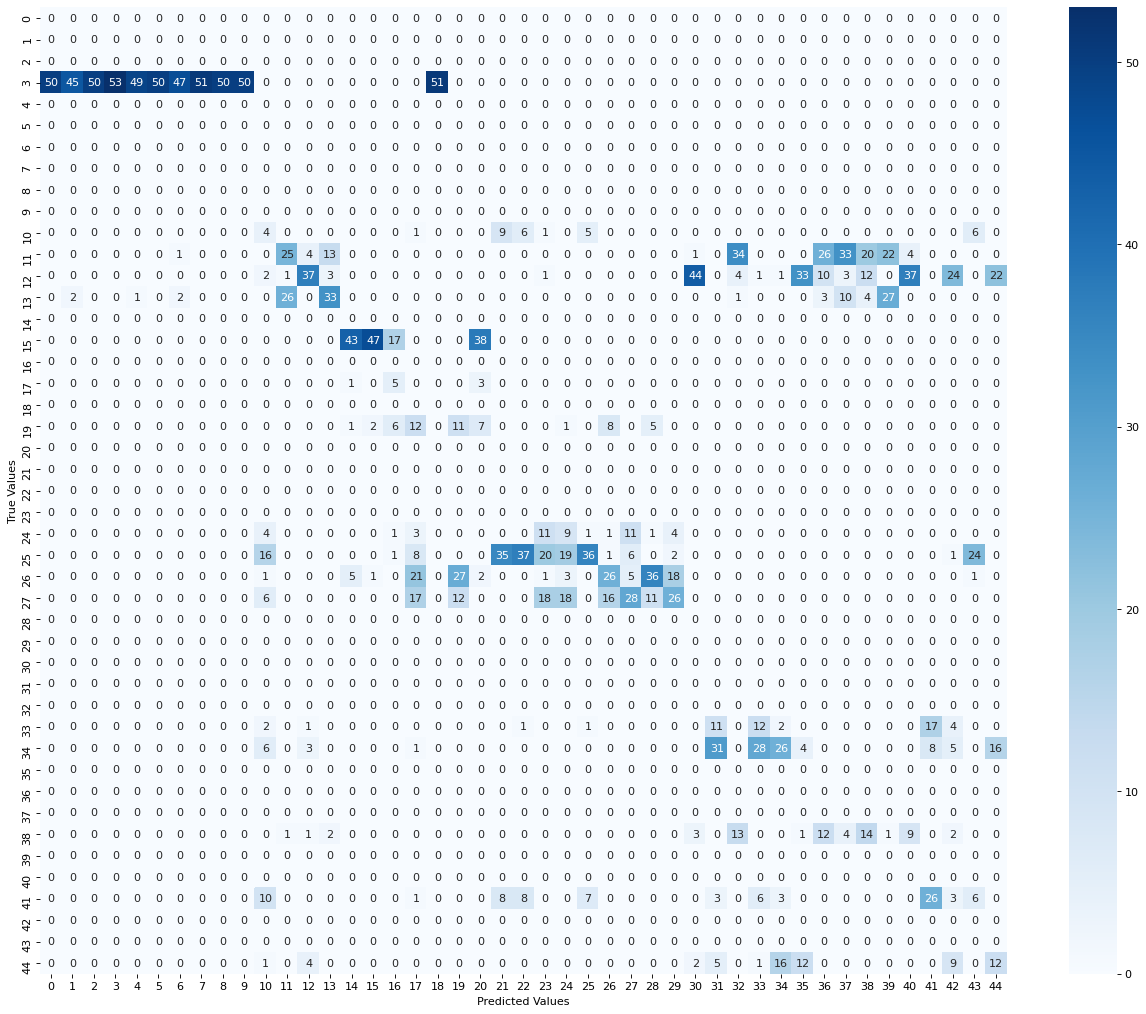

In [ ]:
#計算出所有X_test的圖的信心值
print(f'before np.argmax: result={result}')

#將每一張圖的所有信心值中找最大值的index就能得到該圖的分類結果
#因為是列要找最大值，因此axis=1
y_pred = np.argmax(result,axis=1)

int_y_test = []
for i in range(y_test.shape[0]):
  int_y_test.append(y_test[i].argmax())

#產生Confusion matrix
print(f'after np.argmax: y_pred={y_pred}')
print(f'y_test={int_y_test}')

from sklearn.metrics import confusion_matrix
matrix = confusion_matrix(int_y_test, y_pred)

#繪製Confusion matrix
import seaborn as sns
#square=True表示要將Confusion matrix的每一格皆設定為正方形大小
#annot=True表示要顯示每個格子的數字值
#cbar=True表示要顯示Confusion matrix右側的那條bar（顏色越深表示數字越大）
plt.figure(figsize=(20, 16), dpi=80)
sns.heatmap(matrix.T, square=True, annot=True, cbar=True, cmap=plt.cm.Blues, )

plt.xlabel('Predicted Values')
plt.ylabel('True Values')
plt.show()

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(int_y_test, y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        50
           1       0.00      0.00      0.00        47
           2       0.00      0.00      0.00        50
           3       0.10      1.00      0.18        53
           4       0.00      0.00      0.00        50
           5       0.00      0.00      0.00        50
           6       0.00      0.00      0.00        50
           7       0.00      0.00      0.00        51
           8       0.00      0.00      0.00        50
           9       0.00      0.00      0.00        50
          10       0.12      0.08      0.10        52
          11       0.14      0.47      0.21        53
          12       0.16      0.74      0.26        50
          13       0.30      0.65      0.41        51
          14       0.00      0.00      0.00        50
          15       0.32      0.94      0.48        50
          16       0.00      0.00      0.00        30
          17       0.00    

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#model5(block4)


##create model

In [ ]:
#VGG19
base_model = tensorflow.keras.applications.VGG19(weights='imagenet',
                          include_top=False,
                          input_shape=(32, 32, 3))  
model = tf.keras.Sequential(base_model.layers[:17],name = 'VGG19_combine_data_block4')
model.summary()

Model: "VGG19_combine_data_block4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
block1_conv1 (Conv2D)        (None, 32, 32, 64)        1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 32, 32, 64)        36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 16, 16, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 16, 16, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 16, 16, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 8, 8, 128)         0         
_________________________________________________________________
block3_conv1 (Conv2D)        (None, 8, 8,

In [ ]:
# model
model.add(BatchNormalization())
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(classes, activation='softmax'))
model.summary()

Model: "VGG19_combine_data_block4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
block1_conv1 (Conv2D)        (None, 32, 32, 64)        1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 32, 32, 64)        36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 16, 16, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 16, 16, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 16, 16, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 8, 8, 128)         0         
_________________________________________________________________
block3_conv1 (Conv2D)        (None, 8, 8,

##callbacks setting

In [ ]:
# 增加checkpoint, earlystopping, rlr
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau 
#自動儲存
checkpoint = ModelCheckpoint('/content/drive/MyDrive/VGG19_combinedata_block4_Kfold.h5',  
                monitor='accuracy', 
                verbose=0, 
                save_best_only= True, 
                mode='auto')
#earlystopping
earlystopping = EarlyStopping(monitor='accuracy', mode="auto", patience=5, verbose=1, min_delta=0, restore_best_weights=True)

#學習率 min_delta=0.0001
rlr = ReduceLROnPlateau(monitor='loss', factor=0.1, patience=3, verbose=0, mode='auto', min_delta=0.0001) 

##K-Fold

In [ ]:
kfold = KFold(n_splits=5, shuffle=True)

In [ ]:
# K-fold Cross Validation model evaluation
fold_no = 1

##model compile&fit

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

acc_per_fold = []
loss_per_fold = []
for train, test in kfold.split(X_train, y_train):
  # Generate a print
  print('------------------------------------------------------------------------')
  print(f'Training for fold {fold_no} ...')

  # Fit data to model
  history = model.fit( X_train[train], 
              y_train[train],
              batch_size=64,
              epochs=10,
              # validation_split=0.1,
              callbacks = [checkpoint,earlystopping,rlr],
            )
  # Generate generalization metrics
  scores = model.evaluate(X_train[test], y_train[test], verbose=0)
  print(f'Score for fold {fold_no}: {model.metrics_names[0]} of {scores[0]}; {model.metrics_names[1]} of {scores[1]*100}%')
  acc_per_fold.append(scores[1] * 100)
  loss_per_fold.append(scores[0])

  # Increase fold number
  fold_no = fold_no + 1

------------------------------------------------------------------------
Training for fold 1 ...
Epoch 1/10
70/70 [==============================] - 3s 32ms/step - loss: 3.8220 - accuracy: 0.0438
Epoch 2/10
70/70 [==============================] - 2s 31ms/step - loss: 3.5850 - accuracy: 0.0659
Epoch 3/10
70/70 [==============================] - 2s 31ms/step - loss: 3.4770 - accuracy: 0.0639
Epoch 4/10
70/70 [==============================] - 2s 31ms/step - loss: 3.3846 - accuracy: 0.0770
Epoch 5/10
70/70 [==============================] - 2s 31ms/step - loss: 3.3096 - accuracy: 0.0786
Epoch 6/10
70/70 [==============================] - 2s 31ms/step - loss: 3.2456 - accuracy: 0.0768
Epoch 7/10
70/70 [==============================] - 2s 31ms/step - loss: 3.1339 - accuracy: 0.0874
Epoch 8/10
70/70 [==============================] - 2s 31ms/step - loss: 2.9528 - accuracy: 0.1131
Epoch 9/10
70/70 [==============================] - 2s 31ms/step - loss: 2.8160 - accuracy: 0.1314
Epoch 10/10


##test accuracy

In [ ]:
test_loss, test_accuracy = model.evaluate(X_test,y_test)
print(f'test_loss={test_loss}')
print(f'test_accuracy={test_accuracy}')

71/71 [==============================] - 1s 8ms/step - loss: 0.2565 - accuracy: 0.9622
test_loss=0.2564601004123688
test_accuracy=0.9621886014938354


##draw

估測值=[17 19  3 12  3 13  3 31 12 12  3 13 10 25  3 25 12 15 25 26  3 31 41 17
 12]
[23, 24, 3, 38, 5, 37, 8, 31, 13, 36, 0, 13, 25, 10, 0, 27, 39, 14, 21, 10, 0, 31, 33, 28, 30]


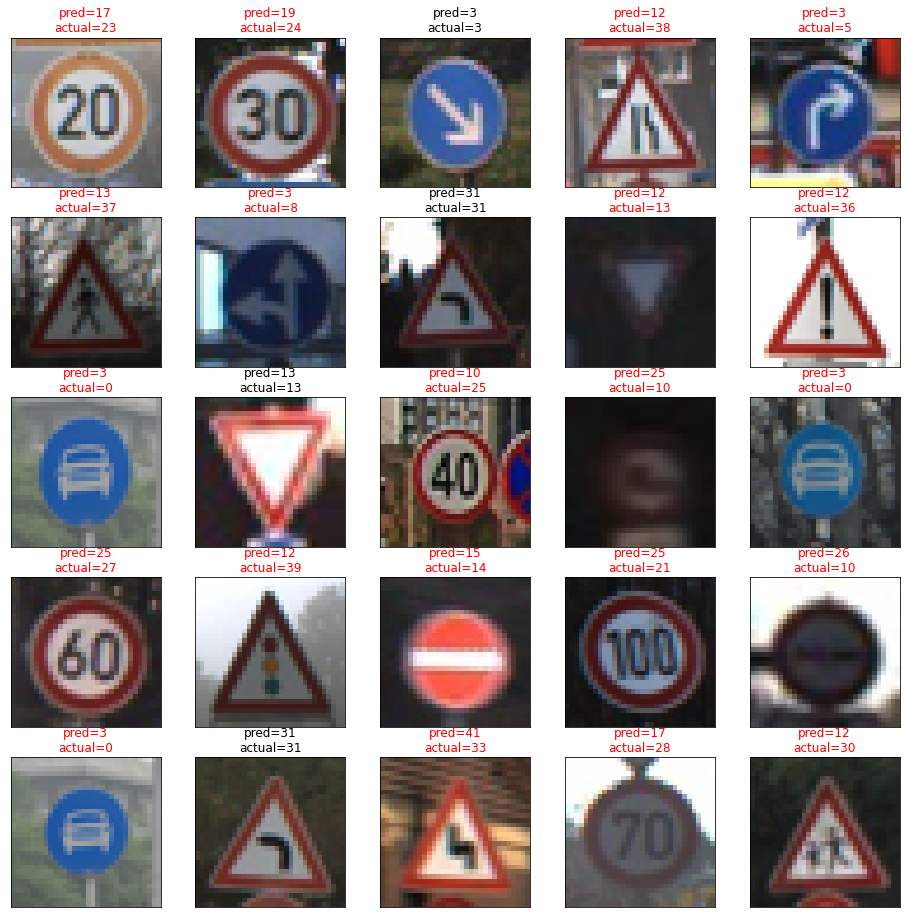

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(16,16))

result = model.predict(X_test)
#每一列為一張圖的估測結果，也就是每一類的信心值
#因此應該取列的最大值所在的index，因此axis=1
print(f'估測值={np.argmax(result[:25],axis=1)}')

#取得標準答案
label = []
for i in range(25):
  label.append(y_test[i].argmax())
print(label)

#目前選擇前25張圖來顯示結果
for i in range(25):
  plt.subplot(5,5, i +1)
  plt.xticks([])
  plt.yticks([])    
  predict_class_name = np.argmax(result[i],axis=0)
  label_name = label[i]
  title1 = plt.title(f'pred={predict_class_name}\nactual={label_name}')
  if predict_class_name != label_name:
    plt.setp(title1, color='r')
  plt.imshow(X_test[i], cmap = plt.get_cmap('gray'))    
plt.show()


before np.argmax: result=[[1.8038232e-15 1.5425813e-13 5.6901624e-15 ... 1.6617230e-06
  6.6874996e-02 2.3871087e-07]
 [2.1917914e-13 1.3289667e-11 5.4225732e-13 ... 4.0210511e-05
  2.8810434e-02 1.0087441e-05]
 [7.3077656e-02 1.3524538e-01 7.3507875e-02 ... 2.4099609e-07
  2.2291274e-13 1.1423975e-08]
 ...
 [1.5049301e-17 1.5573596e-15 5.7331167e-17 ... 5.7042325e-08
  1.2324282e-01 4.8029984e-09]
 [9.2323881e-13 5.0238300e-11 2.1452029e-12 ... 1.0217196e-04
  2.2169517e-02 3.0797990e-05]
 [7.3077403e-02 1.3524731e-01 7.3507935e-02 ... 2.4082652e-07
  2.2274146e-13 1.1414325e-08]]
after np.argmax: y_pred=[17 19  3 ... 17 19  3]
y_test=[23, 24, 3, 38, 5, 37, 8, 31, 13, 36, 0, 13, 25, 10, 0, 27, 39, 14, 21, 10, 0, 31, 33, 28, 30, 22, 17, 1, 24, 12, 25, 10, 32, 23, 21, 41, 18, 12, 23, 9, 0, 22, 0, 43, 14, 2, 29, 40, 39, 38, 2, 9, 39, 34, 17, 7, 32, 18, 19, 2, 24, 31, 19, 20, 35, 42, 37, 10, 13, 37, 40, 30, 44, 29, 32, 35, 31, 2, 26, 25, 38, 30, 5, 26, 18, 30, 29, 29, 44, 10, 1, 29, 41, 3

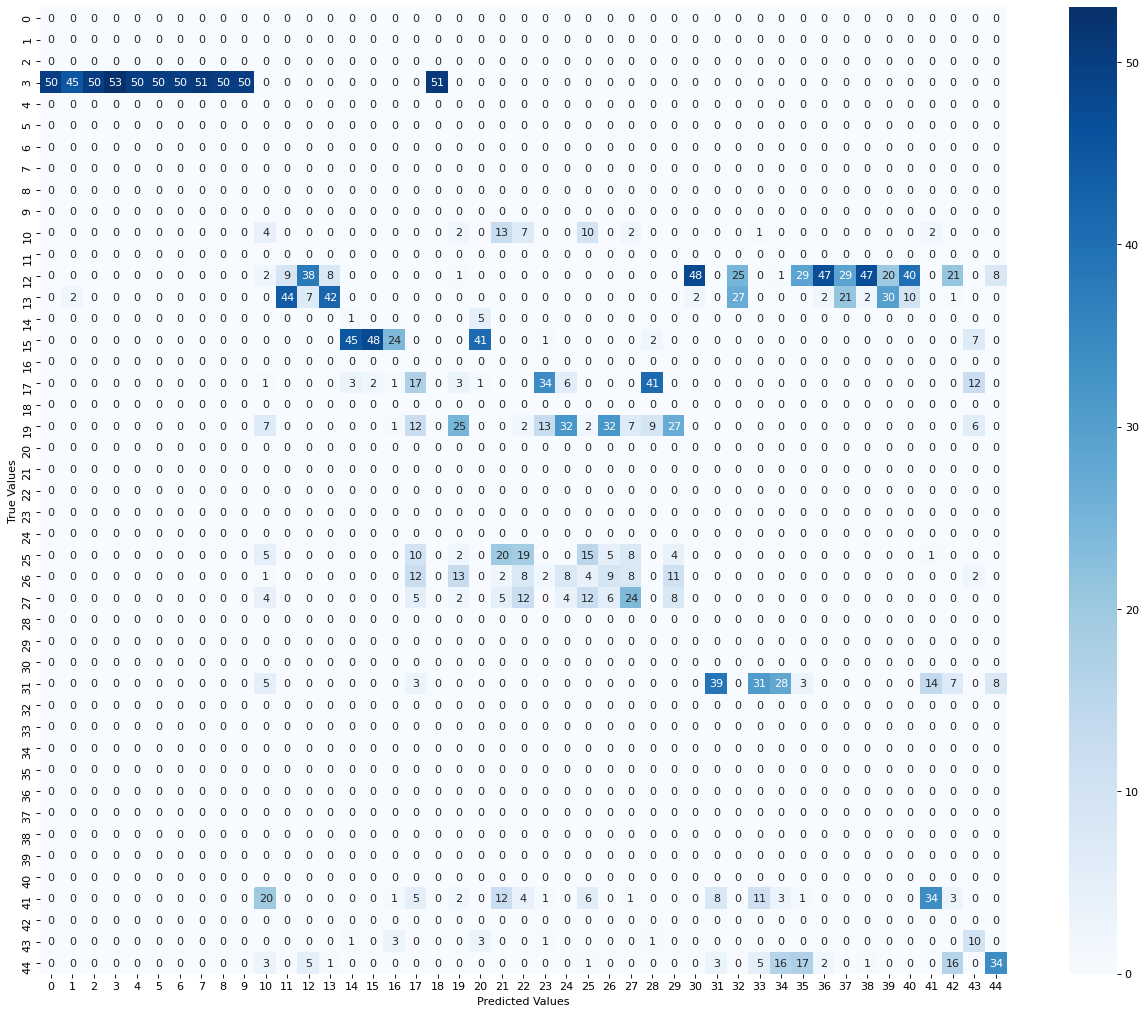

In [ ]:
#計算出所有X_test的圖的信心值
print(f'before np.argmax: result={result}')

#將每一張圖的所有信心值中找最大值的index就能得到該圖的分類結果
#因為是列要找最大值，因此axis=1
y_pred = np.argmax(result,axis=1)

int_y_test = []
for i in range(y_test.shape[0]):
  int_y_test.append(y_test[i].argmax())

#產生Confusion matrix
print(f'after np.argmax: y_pred={y_pred}')
print(f'y_test={int_y_test}')

from sklearn.metrics import confusion_matrix
matrix = confusion_matrix(int_y_test, y_pred)

#繪製Confusion matrix
import seaborn as sns
#square=True表示要將Confusion matrix的每一格皆設定為正方形大小
#annot=True表示要顯示每個格子的數字值
#cbar=True表示要顯示Confusion matrix右側的那條bar（顏色越深表示數字越大）
plt.figure(figsize=(20, 16), dpi=80)
sns.heatmap(matrix.T, square=True, annot=True, cbar=True, cmap=plt.cm.Blues, )

plt.xlabel('Predicted Values')
plt.ylabel('True Values')
plt.show()

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(int_y_test, y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        50
           1       0.00      0.00      0.00        47
           2       0.00      0.00      0.00        50
           3       0.10      1.00      0.18        53
           4       0.00      0.00      0.00        50
           5       0.00      0.00      0.00        50
           6       0.00      0.00      0.00        50
           7       0.00      0.00      0.00        51
           8       0.00      0.00      0.00        50
           9       0.00      0.00      0.00        50
          10       0.10      0.08      0.09        52
          11       0.00      0.00      0.00        53
          12       0.10      0.76      0.18        50
          13       0.22      0.82      0.35        51
          14       0.17      0.02      0.04        50
          15       0.29      0.96      0.44        50
          16       0.00      0.00      0.00        30
          17       0.14    

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#model1(block3)


##create model

In [ ]:
#VGG19
base_model = tensorflow.keras.applications.VGG19(weights='imagenet',
                          include_top=False,
                          input_shape=(32, 32, 3))  
model = tf.keras.Sequential(base_model.layers[:12],name = 'VGG19_combine_data')
model.summary()

80142336/80134624 [==============================] - 0s 0us/step
Model: "VGG19_combine_data"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
block1_conv1 (Conv2D)        (None, 32, 32, 64)        1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 32, 32, 64)        36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 16, 16, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 16, 16, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 16, 16, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 8, 8, 128)         0         
_________________________________________________

In [ ]:
# model
model.add(BatchNormalization())
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(classes, activation='softmax'))
model.summary()

Model: "VGG19_combine_data"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
block1_conv1 (Conv2D)        (None, 32, 32, 64)        1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 32, 32, 64)        36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 16, 16, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 16, 16, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 16, 16, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 8, 8, 128)         0         
_________________________________________________________________
block3_conv1 (Conv2D)        (None, 8, 8, 256)  

##callbacks setting

In [ ]:
# 增加checkpoint, earlystopping, rlr
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau 
#自動儲存
checkpoint = ModelCheckpoint('/content/drive/MyDrive/VGG19_combinedata_Kfold.h5',  
                monitor='accuracy', 
                verbose=0, 
                save_best_only= True, 
                mode='auto')
#earlystopping
earlystopping = EarlyStopping(monitor='accuracy', mode="auto", patience=5, verbose=1, min_delta=0, restore_best_weights=True)

#學習率 min_delta=0.0001
rlr = ReduceLROnPlateau(monitor='loss', factor=0.1, patience=3, verbose=0, mode='auto', min_delta=0.0001) 

##K-Fold

In [ ]:
kfold = KFold(n_splits=5, shuffle=True)

In [ ]:
# K-fold Cross Validation model evaluation
fold_no = 1

##model compile&fit

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

acc_per_fold = []
loss_per_fold = []
for train, test in kfold.split(X_train, y_train):
  # Generate a print
  print('------------------------------------------------------------------------')
  print(f'Training for fold {fold_no} ...')

  # Fit data to model
  history = model.fit( X_train[train], 
              y_train[train],
              batch_size=64,
              epochs=10,
              # validation_split=0.1,
              callbacks = [checkpoint,earlystopping,rlr],
            )
  # Generate generalization metrics
  scores = model.evaluate(X_train[test], y_train[test], verbose=0)
  print(f'Score for fold {fold_no}: {model.metrics_names[0]} of {scores[0]}; {model.metrics_names[1]} of {scores[1]*100}%')
  acc_per_fold.append(scores[1] * 100)
  loss_per_fold.append(scores[0])

  # Increase fold number
  fold_no = fold_no + 1

------------------------------------------------------------------------
Training for fold 1 ...
Epoch 1/10
70/70 [==============================] - 140s 2s/step - loss: 3.5133 - accuracy: 0.1167
Epoch 2/10
70/70 [==============================] - 139s 2s/step - loss: 2.1562 - accuracy: 0.3861
Epoch 3/10
70/70 [==============================] - 139s 2s/step - loss: 0.9767 - accuracy: 0.7026
Epoch 4/10
70/70 [==============================] - 139s 2s/step - loss: 0.5292 - accuracy: 0.8444
Epoch 5/10
70/70 [==============================] - 139s 2s/step - loss: 0.3083 - accuracy: 0.9077
Epoch 6/10
70/70 [==============================] - 139s 2s/step - loss: 0.1391 - accuracy: 0.9596
Epoch 7/10
70/70 [==============================] - 139s 2s/step - loss: 0.1037 - accuracy: 0.9718
Epoch 8/10
70/70 [==============================] - 140s 2s/step - loss: 0.0715 - accuracy: 0.9813
Epoch 9/10
70/70 [==============================] - 140s 2s/step - loss: 0.0661 - accuracy: 0.9828
Epoch 10/10


##test accuracy

In [ ]:
test_loss, test_accuracy = model.evaluate(X_test,y_test)
print(f'test_loss={test_loss}')
print(f'test_accuracy={test_accuracy}')

71/71 [==============================] - 1s 7ms/step - loss: 0.3572 - accuracy: 0.9786
test_loss=0.3572143018245697
test_accuracy=0.9786477088928223


##draw

估測值=[37  5 21 42  6  5 20 13 36 23 29 39 11  5 20 13 30 27 13  6 23  3 37 21
 20]
[37, 5, 21, 42, 6, 5, 20, 13, 36, 23, 29, 39, 11, 5, 20, 13, 30, 27, 13, 6, 23, 3, 37, 21, 20]


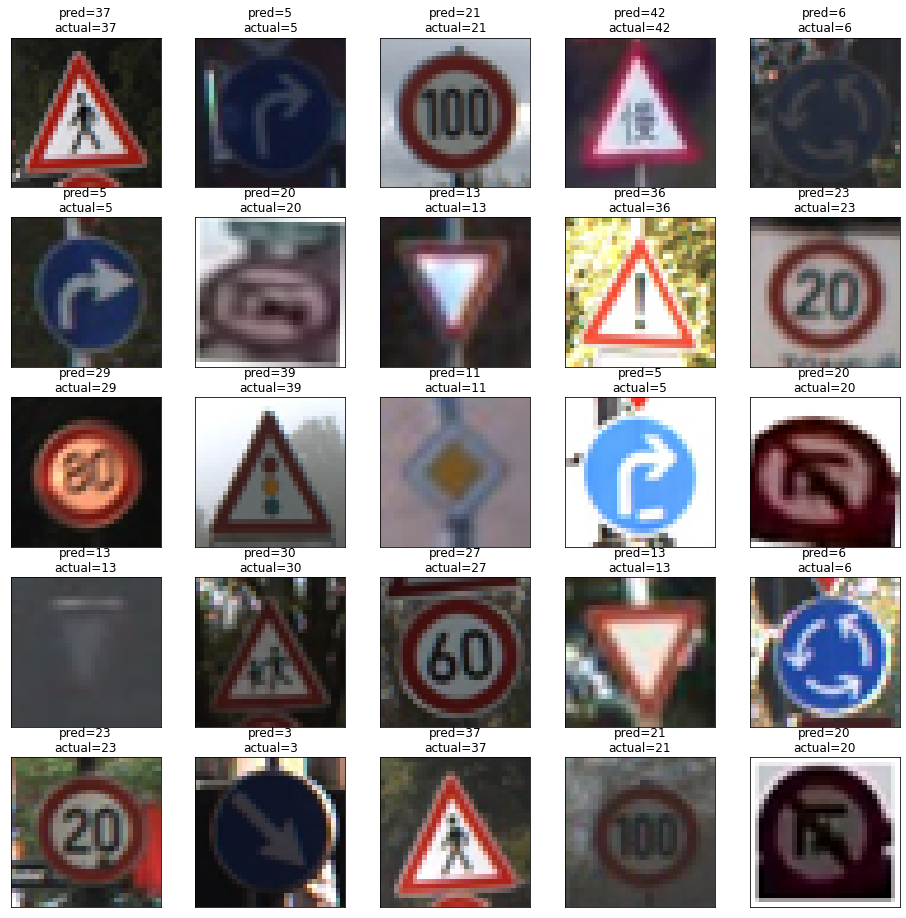

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(16,16))

result = model.predict(X_test)
#每一列為一張圖的估測結果，也就是每一類的信心值
#因此應該取列的最大值所在的index，因此axis=1
print(f'估測值={np.argmax(result[:25],axis=1)}')

#取得標準答案
label = []
for i in range(25):
  label.append(y_test[i].argmax())
print(label)

#目前選擇前25張圖來顯示結果
for i in range(25):
  plt.subplot(5,5, i +1)
  plt.xticks([])
  plt.yticks([])    
  predict_class_name = np.argmax(result[i],axis=0)
  label_name = label[i]
  title1 = plt.title(f'pred={predict_class_name}\nactual={label_name}')
  if predict_class_name != label_name:
    plt.setp(title1, color='r')
  plt.imshow(X_test[i], cmap = plt.get_cmap('gray'))    
plt.show()


before np.argmax: result=[[0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 0.0000000e+00
  0.0000000e+00 0.0000000e+00]
 [3.7469128e-19 3.4735681e-22 3.6479812e-23 ... 5.2474179e-18
  4.5070368e-19 1.4324977e-25]
 [1.5174498e-21 8.4215773e-25 1.3898311e-29 ... 4.2483650e-28
  4.0814274e-18 4.3431206e-31]
 ...
 [1.8945742e-19 7.4417476e-17 3.8512347e-20 ... 8.0507979e-12
  1.3429039e-22 7.1438230e-14]
 [3.4381209e-21 3.0503319e-21 5.5777051e-21 ... 1.6333122e-19
  5.1340809e-18 1.8977026e-15]
 [0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 0.0000000e+00
  0.0000000e+00 3.9887443e-37]]
after np.argmax: y_pred=[37  5 21 ... 40 23 39]
y_test=[37, 5, 21, 42, 6, 5, 20, 13, 36, 23, 29, 39, 11, 5, 20, 13, 30, 27, 13, 6, 23, 3, 37, 21, 20, 27, 20, 8, 31, 21, 4, 3, 40, 17, 5, 12, 34, 12, 30, 19, 17, 40, 9, 19, 14, 21, 18, 38, 21, 14, 22, 25, 13, 17, 6, 42, 1, 3, 44, 4, 24, 39, 12, 34, 12, 24, 19, 10, 43, 37, 34, 9, 35, 43, 27, 26, 37, 12, 21, 28, 2, 28, 2, 2, 13, 3, 28, 37, 2, 28, 22, 29, 14, 44, 

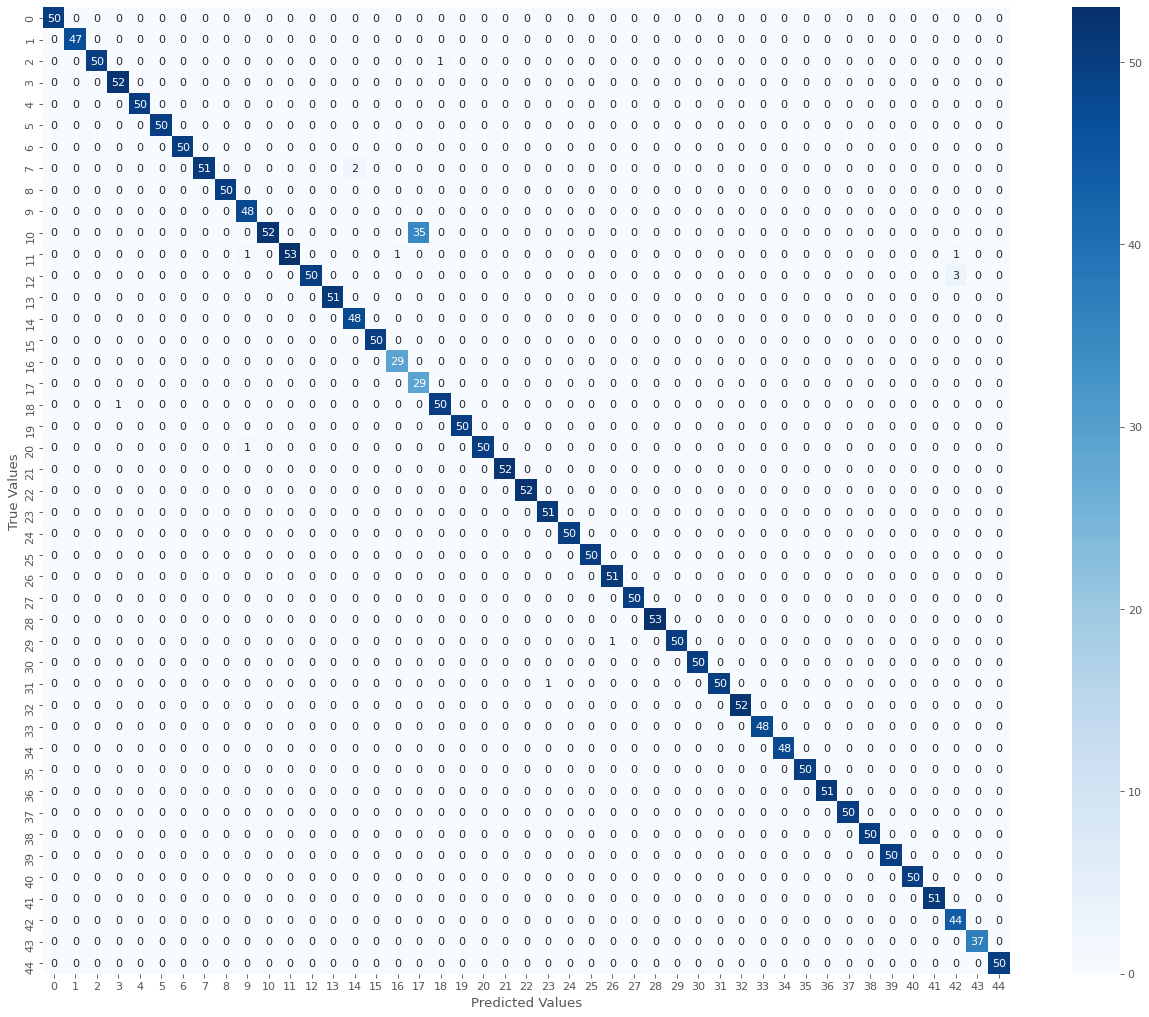

In [ ]:
#計算出所有X_test的圖的信心值
print(f'before np.argmax: result={result}')

#將每一張圖的所有信心值中找最大值的index就能得到該圖的分類結果
#因為是列要找最大值，因此axis=1
y_pred = np.argmax(result,axis=1)

int_y_test = []
for i in range(y_test.shape[0]):
  int_y_test.append(y_test[i].argmax())

#產生Confusion matrix
print(f'after np.argmax: y_pred={y_pred}')
print(f'y_test={int_y_test}')

from sklearn.metrics import confusion_matrix
matrix = confusion_matrix(int_y_test, y_pred)

#繪製Confusion matrix
import seaborn as sns
#square=True表示要將Confusion matrix的每一格皆設定為正方形大小
#annot=True表示要顯示每個格子的數字值
#cbar=True表示要顯示Confusion matrix右側的那條bar（顏色越深表示數字越大）
plt.figure(figsize=(20, 16), dpi=80)
sns.heatmap(matrix.T, square=True, annot=True, cbar=True, cmap=plt.cm.Blues, )

plt.xlabel('Predicted Values')
plt.ylabel('True Values')
plt.show()

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(int_y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       1.00      1.00      1.00        47
           2       0.98      1.00      0.99        50
           3       1.00      0.98      0.99        53
           4       1.00      1.00      1.00        50
           5       1.00      1.00      1.00        50
           6       1.00      1.00      1.00        50
           7       0.96      1.00      0.98        51
           8       1.00      1.00      1.00        50
           9       1.00      0.96      0.98        50
          10       0.60      1.00      0.75        52
          11       0.95      1.00      0.97        53
          12       0.94      1.00      0.97        50
          13       1.00      1.00      1.00        51
          14       1.00      0.96      0.98        50
          15       1.00      1.00      1.00        50
          16       1.00      0.97      0.98        30
          17       1.00    

#model2 (block2)


##create model

In [ ]:
#VGG19
base_model = tensorflow.keras.applications.VGG19(weights='imagenet',
                          include_top=False,
                          input_shape=(32, 32, 3))  
model = tf.keras.Sequential(base_model.layers[:7],name = 'VGG19_combine_data_v2')
model.summary()

Model: "VGG19_combine_data_v2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
block1_conv1 (Conv2D)        (None, 32, 32, 64)        1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 32, 32, 64)        36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 16, 16, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 16, 16, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 16, 16, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 8, 8, 128)         0         
Total params: 260,160
Trainable params: 260,160
Non-trainable params: 0
_______________________________________

In [ ]:
# model
model.add(BatchNormalization())
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(classes, activation='softmax'))
model.summary()

Model: "VGG19_combine_data_v2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
block1_conv1 (Conv2D)        (None, 32, 32, 64)        1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 32, 32, 64)        36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 16, 16, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 16, 16, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 16, 16, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 8, 8, 128)         0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 8, 8, 128

##callbacks setting

In [ ]:
# 增加checkpoint, earlystopping, rlr
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau 
#自動儲存
checkpoint = ModelCheckpoint('/content/drive/MyDrive/VGG19_combinedata_Kfold_v2.h5',  
                monitor='accuracy', 
                verbose=0, 
                save_best_only= True, 
                mode='auto')
#earlystopping
earlystopping = EarlyStopping(monitor='accuracy', mode="auto", patience=5, verbose=1, min_delta=0, restore_best_weights=True)

#學習率 min_delta=0.0001
rlr = ReduceLROnPlateau(monitor='loss', factor=0.1, patience=3, verbose=0, mode='auto', min_delta=0.0001) 

##K-Fold

In [ ]:
kfold = KFold(n_splits=5, shuffle=True)

In [ ]:
# K-fold Cross Validation model evaluation
fold_no = 1

##model compile&fit

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

acc_per_fold = []
loss_per_fold = []
for train, test in kfold.split(X_train, y_train):
  # Generate a print
  print('------------------------------------------------------------------------')
  print(f'Training for fold {fold_no} ...')

  # Fit data to model
  history = model.fit( X_train[train], 
              y_train[train],
              batch_size=64,
              epochs=10,
              # validation_split=0.1,
              callbacks = [checkpoint,earlystopping,rlr],
            )
  # Generate generalization metrics
  scores = model.evaluate(X_train[test], y_train[test], verbose=0)
  print(f'Score for fold {fold_no}: {model.metrics_names[0]} of {scores[0]}; {model.metrics_names[1]} of {scores[1]*100}%')
  acc_per_fold.append(scores[1] * 100)
  loss_per_fold.append(scores[0])

  # Increase fold number
  fold_no = fold_no + 1

------------------------------------------------------------------------
Training for fold 1 ...
Epoch 1/10
70/70 [==============================] - 1s 12ms/step - loss: 1.8652 - accuracy: 0.5389
Epoch 2/10
70/70 [==============================] - 1s 11ms/step - loss: 0.3952 - accuracy: 0.8930
Epoch 3/10
70/70 [==============================] - 1s 11ms/step - loss: 0.1512 - accuracy: 0.9585
Epoch 4/10
70/70 [==============================] - 1s 11ms/step - loss: 0.0785 - accuracy: 0.9795
Epoch 5/10
70/70 [==============================] - 1s 11ms/step - loss: 0.0470 - accuracy: 0.9867
Epoch 6/10
70/70 [==============================] - 1s 11ms/step - loss: 0.0437 - accuracy: 0.9883
Epoch 7/10
70/70 [==============================] - 1s 11ms/step - loss: 0.0446 - accuracy: 0.9869
Epoch 8/10
70/70 [==============================] - 1s 11ms/step - loss: 0.0389 - accuracy: 0.9880
Epoch 9/10
70/70 [==============================] - 1s 11ms/step - loss: 0.0450 - accuracy: 0.9876
Epoch 10/10


##test accuracy

In [ ]:
test_loss, test_accuracy = model.evaluate(X_test,y_test)
print(f'test_loss={test_loss}')
print(f'test_accuracy={test_accuracy}')

71/71 [==============================] - 0s 4ms/step - loss: 0.0211 - accuracy: 0.9933
test_loss=0.02105957269668579
test_accuracy=0.9933273792266846


##draw

估測值=[12 42 15 38 40 16 12 36 44 15 40 43 15 41  9 16 15 33 44 42 35 19  5 24
 15]
[12, 42, 15, 38, 40, 16, 12, 36, 44, 15, 40, 43, 15, 41, 9, 16, 15, 33, 44, 42, 35, 19, 5, 24, 15]


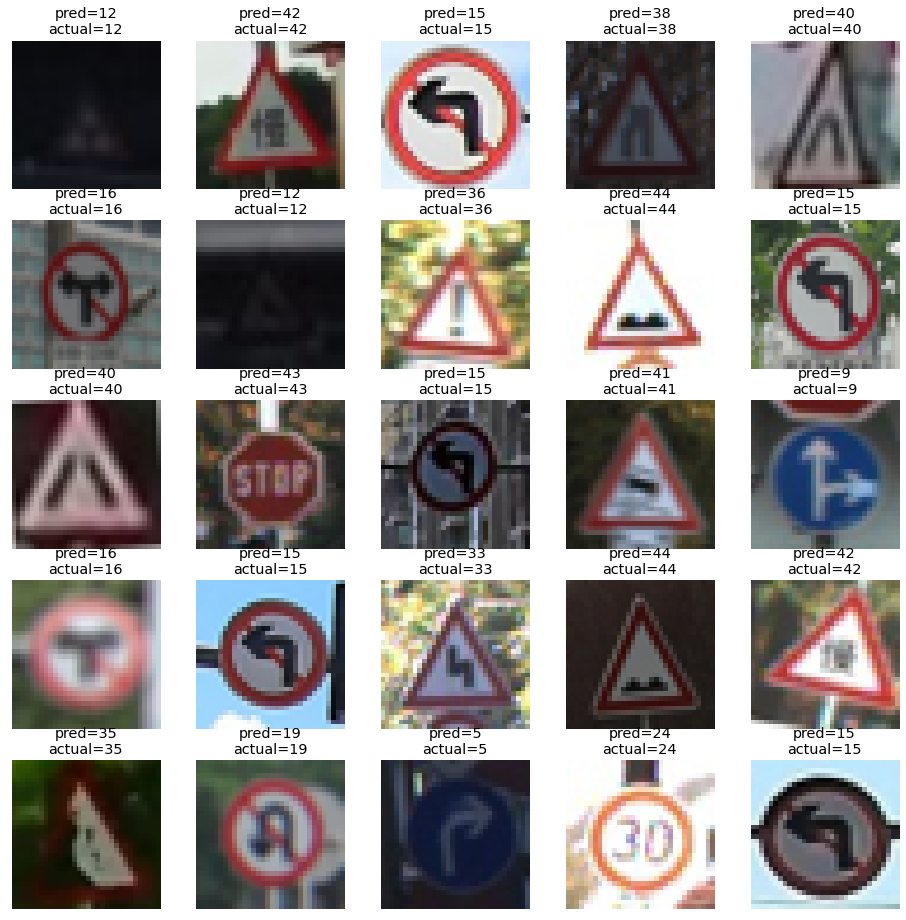

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(16,16))

result = model.predict(X_test)
#每一列為一張圖的估測結果，也就是每一類的信心值
#因此應該取列的最大值所在的index，因此axis=1
print(f'估測值={np.argmax(result[:25],axis=1)}')

#取得標準答案
label = []
for i in range(25):
  label.append(y_test[i].argmax())
print(label)

#目前選擇前25張圖來顯示結果
for i in range(25):
  plt.subplot(5,5, i +1)
  plt.xticks([])
  plt.yticks([])    
  predict_class_name = np.argmax(result[i],axis=0)
  label_name = label[i]
  title1 = plt.title(f'pred={predict_class_name}\nactual={label_name}')
  if predict_class_name != label_name:
    plt.setp(title1, color='r')
  plt.imshow(X_test[i], cmap = plt.get_cmap('gray'))    
plt.show()


before np.argmax: result=[[3.6962723e-05 1.7046275e-05 3.8933857e-05 ... 6.4486587e-05
  8.6674572e-06 3.8650109e-05]
 [7.0830672e-12 5.4866446e-12 1.3121746e-11 ... 9.9999142e-01
  1.8870018e-12 1.9706887e-09]
 [3.1546016e-20 1.2908316e-16 1.1883035e-24 ... 1.2014173e-23
  8.1351339e-21 4.2419422e-25]
 ...
 [5.3811275e-11 1.1019534e-11 2.7061762e-12 ... 6.7094961e-09
  2.0468310e-13 4.3476565e-08]
 [9.6896645e-17 2.3118741e-11 5.2950734e-18 ... 7.9338036e-15
  4.5858316e-16 7.6147086e-13]
 [1.3654767e-24 5.7951956e-25 1.4654699e-29 ... 6.0768728e-28
  8.7216533e-24 1.1685049e-27]]
after np.argmax: y_pred=[12 42 15 ... 40 33  9]
y_test=[12, 42, 15, 38, 40, 16, 12, 36, 44, 15, 40, 43, 15, 41, 9, 16, 15, 33, 44, 42, 35, 19, 5, 24, 15, 20, 39, 15, 31, 21, 41, 21, 14, 21, 4, 12, 3, 4, 23, 34, 37, 33, 44, 39, 12, 20, 6, 3, 26, 15, 31, 7, 11, 24, 28, 11, 2, 32, 13, 19, 14, 37, 35, 4, 33, 1, 13, 0, 37, 41, 21, 14, 14, 13, 28, 15, 10, 16, 0, 11, 17, 27, 20, 31, 35, 7, 20, 30, 15, 27, 43, 28, 3

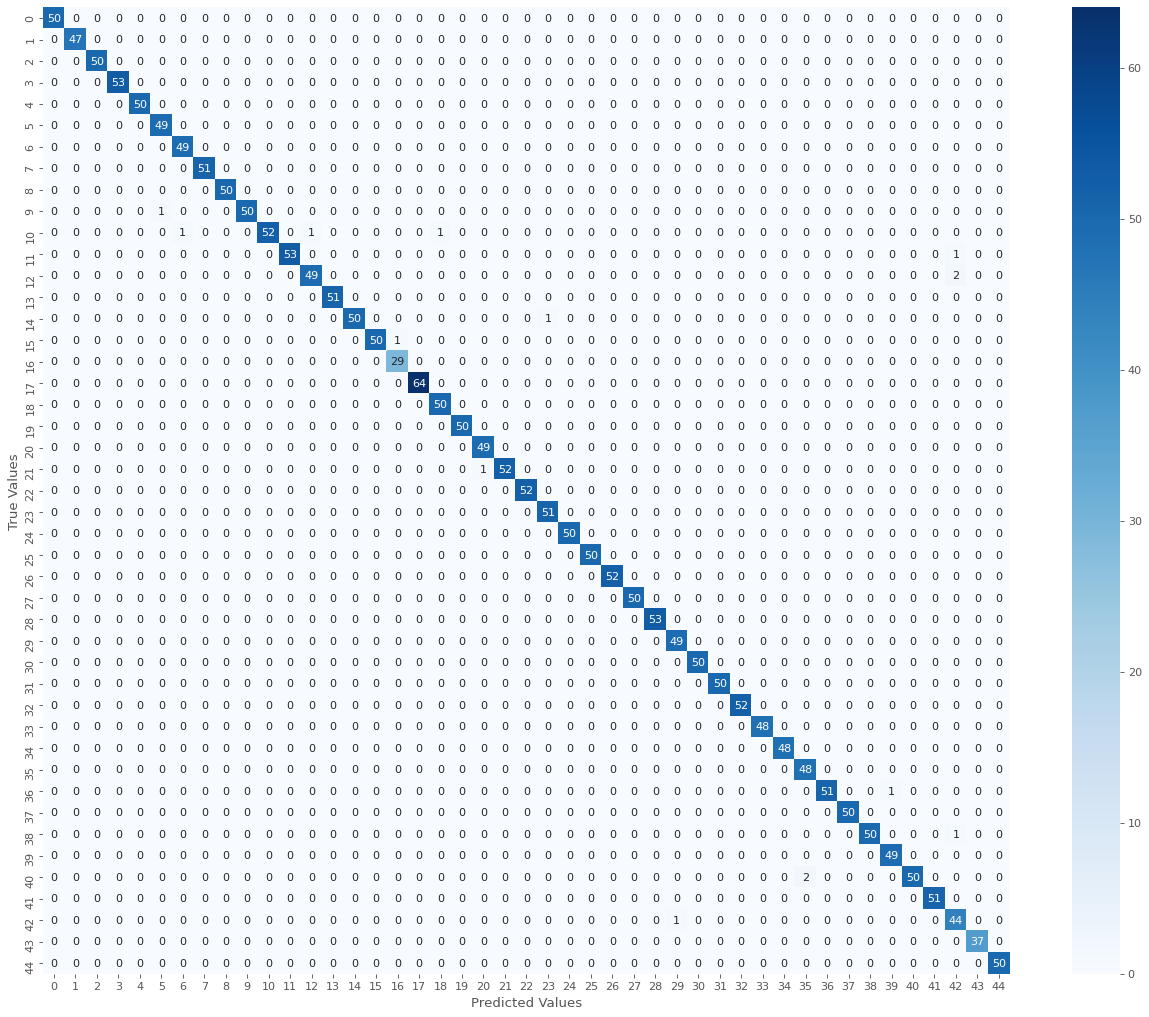

In [ ]:
#計算出所有X_test的圖的信心值
print(f'before np.argmax: result={result}')

#將每一張圖的所有信心值中找最大值的index就能得到該圖的分類結果
#因為是列要找最大值，因此axis=1
y_pred = np.argmax(result,axis=1)

int_y_test = []
for i in range(y_test.shape[0]):
  int_y_test.append(y_test[i].argmax())

#產生Confusion matrix
print(f'after np.argmax: y_pred={y_pred}')
print(f'y_test={int_y_test}')

from sklearn.metrics import confusion_matrix
matrix = confusion_matrix(int_y_test, y_pred)

#繪製Confusion matrix
import seaborn as sns
#square=True表示要將Confusion matrix的每一格皆設定為正方形大小
#annot=True表示要顯示每個格子的數字值
#cbar=True表示要顯示Confusion matrix右側的那條bar（顏色越深表示數字越大）
plt.figure(figsize=(20, 16), dpi=80)
sns.heatmap(matrix.T, square=True, annot=True, cbar=True, cmap=plt.cm.Blues, )

plt.xlabel('Predicted Values')
plt.ylabel('True Values')
plt.show()

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(int_y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       1.00      1.00      1.00        47
           2       1.00      1.00      1.00        50
           3       1.00      1.00      1.00        53
           4       1.00      1.00      1.00        50
           5       1.00      0.98      0.99        50
           6       1.00      0.98      0.99        50
           7       1.00      1.00      1.00        51
           8       1.00      1.00      1.00        50
           9       0.98      1.00      0.99        50
          10       0.95      1.00      0.97        52
          11       0.98      1.00      0.99        53
          12       0.96      0.98      0.97        50
          13       1.00      1.00      1.00        51
          14       0.98      1.00      0.99        50
          15       0.98      1.00      0.99        50
          16       1.00      0.97      0.98        30
          17       1.00    

#model3(block1)


##create model

In [ ]:
#VGG19
base_model = tensorflow.keras.applications.VGG19(weights='imagenet',
                          include_top=False,
                          input_shape=(32, 32, 3))  
model = tf.keras.Sequential(base_model.layers[:4],name = 'VGG19_combine_data_short')
model.summary()

80142336/80134624 [==============================] - 1s 0us/step
Model: "VGG19_combine_data_short"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
block1_conv1 (Conv2D)        (None, 32, 32, 64)        1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 32, 32, 64)        36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 16, 16, 64)        0         
Total params: 38,720
Trainable params: 38,720
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# model
model.add(BatchNormalization())
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(classes, activation='softmax'))
model.summary()

Model: "VGG19_combine_data_short"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
block1_conv1 (Conv2D)        (None, 32, 32, 64)        1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 32, 32, 64)        36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 16, 16, 64)        0         
_________________________________________________________________
batch_normalization (BatchNo (None, 16, 16, 64)        256       
_________________________________________________________________
flatten (Flatten)            (None, 16384)             0         
_________________________________________________________________
dense (Dense)                (None, 256)               4194560   
_________________________________________________________________
dropout (Dropout)            (None, 256)  

##callbacks setting

In [ ]:
# 增加checkpoint, earlystopping, rlr
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau 
#自動儲存
checkpoint = ModelCheckpoint('/content/drive/MyDrive/VGG19_combinedata_Short_Kfold.h5',  
                monitor='accuracy', 
                verbose=0, 
                save_best_only= True, 
                mode='auto')
#earlystopping
earlystopping = EarlyStopping(monitor='accuracy', mode="auto", patience=5, verbose=1, min_delta=0, restore_best_weights=True)

#學習率 min_delta=0.0001
rlr = ReduceLROnPlateau(monitor='loss', factor=0.1, patience=3, verbose=0, mode='auto', min_delta=0.0001) 

##K-Fold

In [ ]:
kfold = KFold(n_splits=5, shuffle=True)

In [ ]:
# K-fold Cross Validation model evaluation
fold_no = 1

##model compile&fit

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

acc_per_fold = []
loss_per_fold = []
for train, test in kfold.split(X_train, y_train):
  # Generate a print
  print('------------------------------------------------------------------------')
  print(f'Training for fold {fold_no} ...')

  # Fit data to model
  history = model.fit( X_train[train], 
              y_train[train],
              batch_size=64,
              epochs=10,
              # validation_split=0.1,
              callbacks = [checkpoint,earlystopping,rlr],
            )
  # Generate generalization metrics
  scores = model.evaluate(X_train[test], y_train[test], verbose=0)
  print(f'Score for fold {fold_no}: {model.metrics_names[0]} of {scores[0]}; {model.metrics_names[1]} of {scores[1]*100}%')
  acc_per_fold.append(scores[1] * 100)
  loss_per_fold.append(scores[0])

  # Increase fold number
  fold_no = fold_no + 1

------------------------------------------------------------------------
Training for fold 1 ...
Epoch 1/10
70/70 [==============================] - 32s 10ms/step - loss: 3.2970 - accuracy: 0.2908
Epoch 2/10
70/70 [==============================] - 1s 9ms/step - loss: 1.3757 - accuracy: 0.6198
Epoch 3/10
70/70 [==============================] - 1s 9ms/step - loss: 0.8395 - accuracy: 0.7722
Epoch 4/10
70/70 [==============================] - 1s 9ms/step - loss: 0.5353 - accuracy: 0.8501
Epoch 5/10
70/70 [==============================] - 1s 9ms/step - loss: 0.3732 - accuracy: 0.8925
Epoch 6/10
70/70 [==============================] - 1s 9ms/step - loss: 0.2921 - accuracy: 0.9149
Epoch 7/10
70/70 [==============================] - 1s 9ms/step - loss: 0.2249 - accuracy: 0.9323
Epoch 8/10
70/70 [==============================] - 1s 9ms/step - loss: 0.1985 - accuracy: 0.9429
Epoch 9/10
70/70 [==============================] - 1s 9ms/step - loss: 0.1461 - accuracy: 0.9573
Epoch 10/10
70/70 [

##test accuracy

In [ ]:
test_loss, test_accuracy = model.evaluate(X_test,y_test)
print(f'test_loss={test_loss}')
print(f'test_accuracy={test_accuracy}')

71/71 [==============================] - 0s 4ms/step - loss: 0.0559 - accuracy: 0.9862
test_loss=0.05590471252799034
test_accuracy=0.9862099885940552


##draw

估測值=[23 24  3 38  5 37  8 31 13 36  0 13 25 10  0 27 39 14 21 10  0 31 33 28
 30]
[23, 24, 3, 38, 5, 37, 8, 31, 13, 36, 0, 13, 25, 10, 0, 27, 39, 14, 21, 10, 0, 31, 33, 28, 30]


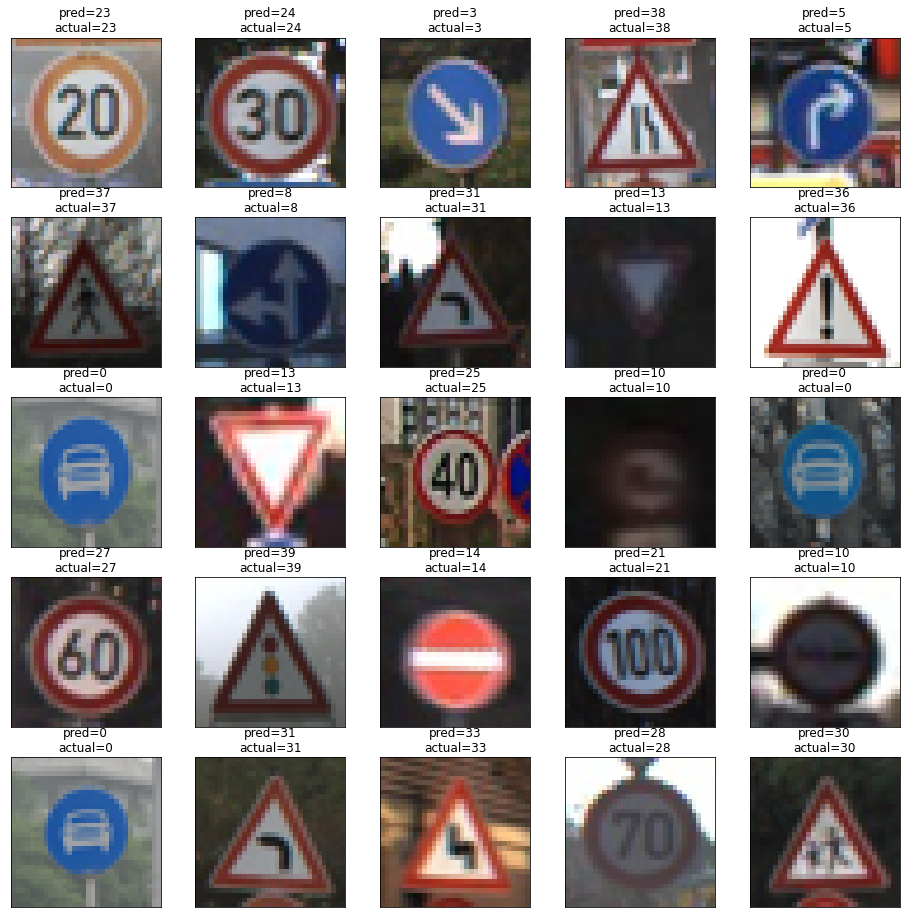

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(16,16))

result = model.predict(X_test)
#每一列為一張圖的估測結果，也就是每一類的信心值
#因此應該取列的最大值所在的index，因此axis=1
print(f'估測值={np.argmax(result[:25],axis=1)}')

#取得標準答案
label = []
for i in range(25):
  label.append(y_test[i].argmax())
print(label)

#目前選擇前25張圖來顯示結果
for i in range(25):
  plt.subplot(5,5, i +1)
  plt.xticks([])
  plt.yticks([])    
  predict_class_name = np.argmax(result[i],axis=0)
  label_name = label[i]
  title1 = plt.title(f'pred={predict_class_name}\nactual={label_name}')
  if predict_class_name != label_name:
    plt.setp(title1, color='r')
  plt.imshow(X_test[i], cmap = plt.get_cmap('gray'))    
plt.show()


before np.argmax: result=[[6.8053468e-24 1.5912862e-22 6.9752223e-29 ... 3.0598838e-24
  1.5579980e-22 1.5620763e-27]
 [6.8921244e-27 1.0995627e-24 1.4842575e-26 ... 9.5273664e-17
  8.3726239e-19 3.4353684e-28]
 [3.1704692e-33 8.5462039e-33 0.0000000e+00 ... 0.0000000e+00
  0.0000000e+00 0.0000000e+00]
 ...
 [3.1852404e-16 1.0760214e-14 1.1970814e-12 ... 7.3620582e-10
  4.5967775e-11 2.2972577e-14]
 [2.4292886e-33 9.2627516e-31 2.7964806e-31 ... 5.5563840e-36
  1.9483405e-28 2.3830078e-28]
 [5.4917098e-22 4.9761387e-19 9.9114893e-28 ... 1.7286459e-34
  1.0024454e-28 8.2320078e-27]]
after np.argmax: y_pred=[23 24  3 ... 24 26  3]
y_test=[23, 24, 3, 38, 5, 37, 8, 31, 13, 36, 0, 13, 25, 10, 0, 27, 39, 14, 21, 10, 0, 31, 33, 28, 30, 22, 17, 1, 24, 12, 25, 10, 32, 23, 21, 41, 18, 12, 23, 9, 0, 22, 0, 43, 14, 2, 29, 40, 39, 38, 2, 9, 39, 34, 17, 7, 32, 18, 19, 2, 24, 31, 19, 20, 35, 42, 37, 10, 13, 37, 40, 30, 44, 29, 32, 35, 31, 2, 26, 25, 38, 30, 5, 26, 18, 30, 29, 29, 44, 10, 1, 29, 41, 3

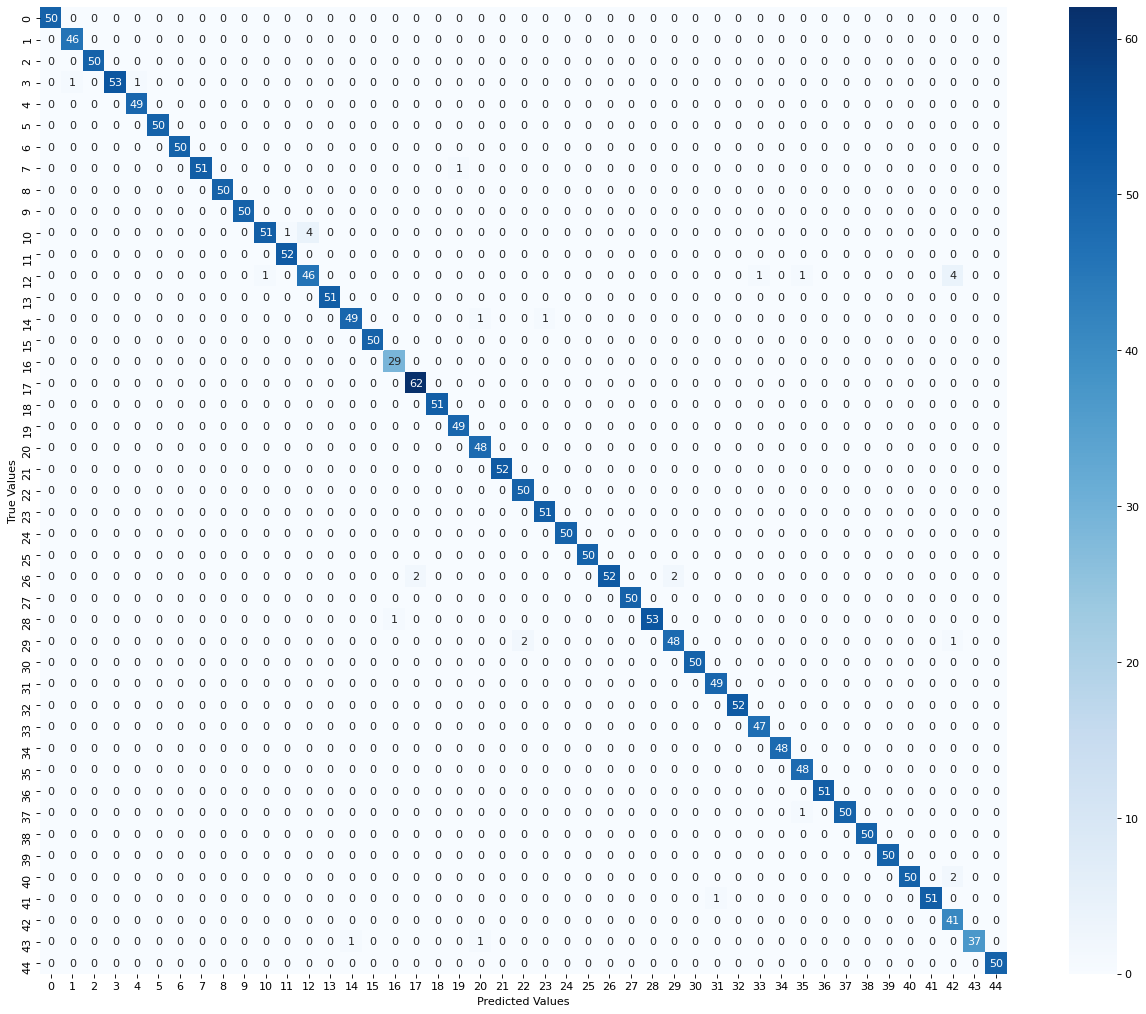

In [ ]:
#計算出所有X_test的圖的信心值
print(f'before np.argmax: result={result}')

#將每一張圖的所有信心值中找最大值的index就能得到該圖的分類結果
#因為是列要找最大值，因此axis=1
y_pred = np.argmax(result,axis=1)

int_y_test = []
for i in range(y_test.shape[0]):
  int_y_test.append(y_test[i].argmax())

#產生Confusion matrix
print(f'after np.argmax: y_pred={y_pred}')
print(f'y_test={int_y_test}')

from sklearn.metrics import confusion_matrix
matrix = confusion_matrix(int_y_test, y_pred)

#繪製Confusion matrix
import seaborn as sns
#square=True表示要將Confusion matrix的每一格皆設定為正方形大小
#annot=True表示要顯示每個格子的數字值
#cbar=True表示要顯示Confusion matrix右側的那條bar（顏色越深表示數字越大）
plt.figure(figsize=(20, 16), dpi=80)
sns.heatmap(matrix.T, square=True, annot=True, cbar=True, cmap=plt.cm.Blues, )

plt.xlabel('Predicted Values')
plt.ylabel('True Values')
plt.show()

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(int_y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       1.00      0.98      0.99        47
           2       1.00      1.00      1.00        50
           3       0.96      1.00      0.98        53
           4       1.00      0.98      0.99        50
           5       1.00      1.00      1.00        50
           6       1.00      1.00      1.00        50
           7       0.98      1.00      0.99        51
           8       1.00      1.00      1.00        50
           9       1.00      1.00      1.00        50
          10       0.91      0.98      0.94        52
          11       1.00      0.98      0.99        53
          12       0.87      0.92      0.89        50
          13       1.00      1.00      1.00        51
          14       0.96      0.98      0.97        50
          15       1.00      1.00      1.00        50
          16       1.00      0.97      0.98        30
          17       1.00    